### Analyse data Titanic Disaster

### Model: Decision Tree Regression

In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

# import package Starts
from Starts.startmodskl import *

local_kwargs {'data_path': './data/train.csv, ./data/titanic_no_nan.csv ,./data/test.csv', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


In [2]:
# Process Nan_Column by dropping them
nonan_data = idata[1]
StartML.nan_columns(nonan_data)

[]

In [3]:
# There are only numeric columns
StartML.idx_columns(nonan_data)

[('Survived', 0, dtype('int64')),
 ('Pclass', 1, dtype('int64')),
 ('Sex', 2, dtype('int64')),
 ('Age', 3, dtype('float64')),
 ('Ticket', 4, dtype('int64')),
 ('Fare', 5, dtype('float64')),
 ('Title', 6, dtype('int64')),
 ('FamilySize', 7, dtype('int64'))]

In [4]:
nonan_data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Title,FamilySize
0,0,3,1,29.699118,199,7.2292,5,0
1,1,3,0,0.750000,194,19.2583,4,3
2,0,3,1,29.699118,487,6.8583,5,0
3,1,1,1,36.000000,33,120.0000,5,3
4,0,2,1,29.699118,629,15.0500,5,0


In [5]:
# normalize the data using the Min_Max method
StartMod.feature_scaling(nonan_data).head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Title,FamilySize
0,0.0,1.0,1.0,0.367921,0.292647,0.014110,0.625,0.0
1,1.0,1.0,0.0,0.004147,0.285294,0.037590,0.500,0.3
2,0.0,1.0,1.0,0.367921,0.716176,0.013387,0.625,0.0
3,1.0,0.0,1.0,0.447097,0.048529,0.234224,0.625,0.3
4,0.0,0.5,1.0,0.367921,0.925000,0.029376,0.625,0.0


Features:  Index(['Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Title', 'FamilySize'], dtype='object') 
Features_Important:  [ 0.06377844  0.33381198  0.13309577  0.21926245  0.12618459  0.04072896
  0.08313781]


/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


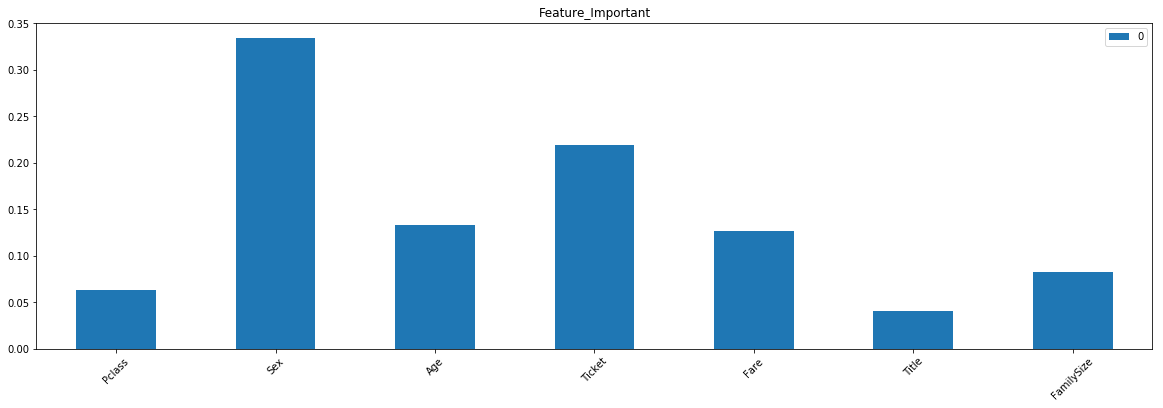

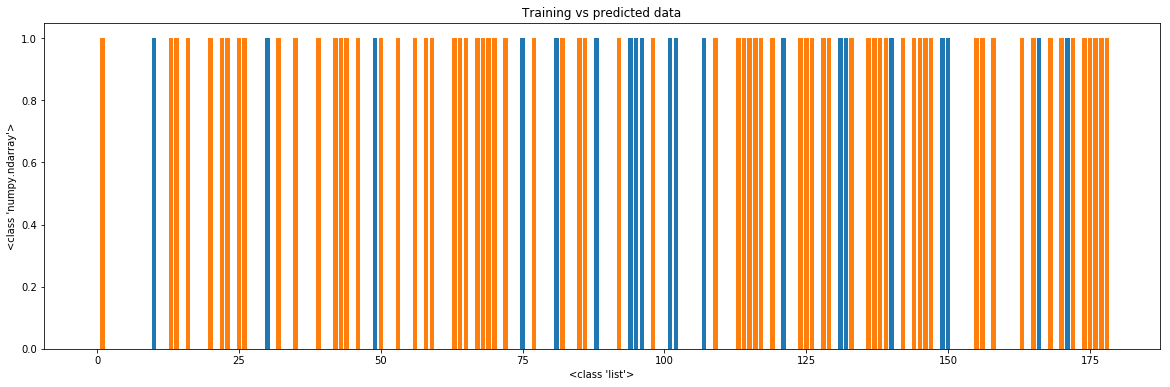

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

In [6]:
# Choose method Linear Regression to predict the Survivors
reg_dt, y_true, y_predict = StartModSKL.regression_decision_tree(nonan_data, 'Survived', vis=True)
reg_dt

In [12]:
reg_dt.feature_importances_

array([ 0.06377844,  0.33381198,  0.13309577,  0.21926245,  0.12618459,
        0.04072896,  0.08313781])

In [8]:
# Convert predicted value by rounding it (>0.5 will be considered as 1 else 0)
y_pred = np.array([np.round(item) for item in y_predict ])

# Compare the predicted value with true_value
len(y_true), len(y_pred)

(179, 179)

In [9]:
StartMod.metrics_report(y_true, y_pred)

Classification Report: 
              precision    recall  f1-score   support

        0.0       0.82      0.79      0.80       113
        1.0       0.66      0.70      0.68        66

avg / total       0.76      0.75      0.76       179

Confusion Matrix: 
 [[89 24]
 [20 46]]

Mean_Squared_Error: 
 0.245810055866

Accuracy Score: 
 0.754189944134
binary

Precision Score: 
 0.657142857143

Recall Score: 
 0.69696969697

F-Score: 
 0.676470588235


### Result: 
#### the correct predicted result 135, 
#### the wrong predicted result 44